# Εργασία 5

Ερώτημα 1

In [1]:
#importing mecessary packages
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

#and now checking their shape

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


Ερώτημα 2

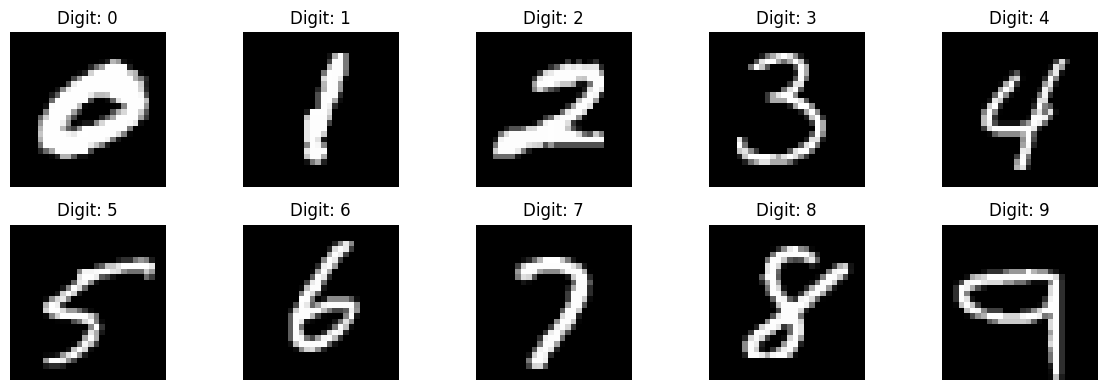

In [2]:
#creating th plot
plt.figure(figsize=(12, 4))
#doing this for all the digits(0-9)
for digit in range(10):
   #finding the position of the x for ever y==digit
    indices = np.where(y_train == digit)[0]

#choosing randomly from the indices
    random_index = np.random.choice(indices)
    img = x_train[random_index]

    plt.subplot(2, 5, digit + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Digit: {digit}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Ερώτημα 3

Οι γράμμες και οι στήλες είναι 28 αντίστοιχα, όπως είδαμε στο πρώτο ερώτημα. Οπότε συνολικά τα pixel είναι 28 επί 28 = 784.
Από αυτά δεν είναι όλα σημαντικά, γιατί τα περισσότερα είναι το μάυρο φόντο γύρω γύρω, και έτσι δεν προσφέρουν καμία πληροφορία για το σχήμα του ψηφίου. Σημαντικά είναι μόνο αυτά που σχηματίζουν τα ψηφία κάθε φορά.

Ερώτημα 4

In [3]:
#we turn them into vectors now by reshaping th images
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat  = x_test.reshape(len(x_test), 28*28)
#and checking what we made
print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


Ερώτημα 5

Training KNN with k=5:
The accuracy of train set is: 0.9819
The accuracy of test set is:  0.9688
Training KNN with k=15:
The accuracy of train set is: 0.9710
The accuracy of test set is:  0.9633
Training KNN with k=51:
The accuracy of train set is: 0.9532
The accuracy of test set is:  0.9533
Training KNN with k=244:
The accuracy of train set is: 0.9211
The accuracy of test set is:  0.9241


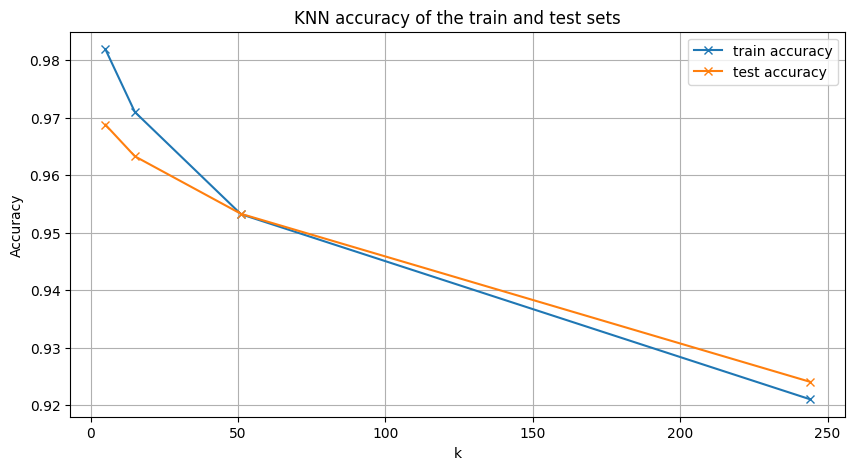

In [4]:
#defining k
N = len(x_train)
k_list = [5, 15, 51, int(np.sqrt(N))]

train_acc = []
test_acc = []

#training process, predictions, accuracy
for k in k_list:
    print(f"Training KNN with k={k}:")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)

    y_pred_train = knn.predict(x_train_flat)
    y_pred_test = knn.predict(x_test_flat)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    print(f"The accuracy of train set is: {train_accuracy:.4f}")
    print(f"The accuracy of test set is:  {test_accuracy:.4f}")



plt.figure(figsize=(10,5))
plt.plot(k_list, train_acc, marker='x', label="train accuracy")
plt.plot(k_list, test_acc, marker='x', label="test accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN accuracy of the train and test sets")
plt.legend()
plt.grid(True)
plt.show()


Ερώτημα 6

In [5]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

x_train_flat_new = x_train_norm.reshape(len(x_train_norm), 784)
x_test_flat_new  = x_test_norm.reshape(len(x_test_norm), 784)

k_list = [5, 15, 51, int(np.sqrt(len(x_train)))]
train_acc_new = []
test_acc_new = []

for k in k_list:
    print(f"Now training KNN with k={k} on normalized data:")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat_new, y_train)

    y_pred_train = knn.predict(x_train_flat_new)
    y_pred_test = knn.predict(x_test_flat_new)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_acc_new.append(train_accuracy)
    test_acc_new.append(test_accuracy)

    print(f"The accurcay on train set is: {train_accuracy:.4f}")
    print(f"The accuracy on test set is:  {test_accuracy:.4f}")

Now training KNN with k=5 on normalized data:
The accurcay on train set is: 0.9819
The accuracy on test set is:  0.9688
Now training KNN with k=15 on normalized data:
The accurcay on train set is: 0.9710
The accuracy on test set is:  0.9633
Now training KNN with k=51 on normalized data:
The accurcay on train set is: 0.9532
The accuracy on test set is:  0.9533
Now training KNN with k=244 on normalized data:
The accurcay on train set is: 0.9211
The accuracy on test set is:  0.9241


Τα αποτελέσματα δείχνουν πως μετά την κανονικοποίηση η ακρίβεια στα σετ εκπαίδευσης και τεστ ήταν σχεδόν ίδια με την προηγούμενη. Συνεπώς η απόδοση του ΚΝΝ δεν επηρεάζεται τόσο από την κανονικοποίηση. Να σημειώσουμε όμως, πως αυτό συμβαίνει επειδή τα πιξελ κλιμακώνονται με τον ίδιο παράγοντα οπότε οι αποστάσεις μεταξύ τους παραμένουν ίδιες.

Ερώτημα 7

Saving paintdigit.png to paintdigit.png


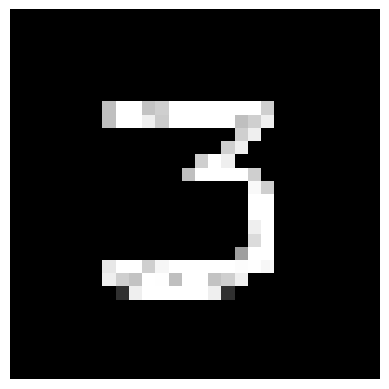

my best classifier predicts digit: 3


In [7]:
from google.colab import files
uploaded = files.upload()


k_best = 5
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(x_train_flat_new, y_train)

from PIL import Image

filename = list(uploaded.keys())[0]
img = Image.open(filename).convert('L')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


img_arr = np.array(img)
img_arr = img_arr / 255.0
img_flat = img_arr.reshape(1, 28*28)
pred = knn_best.predict(img_flat)
print("my best classifier predicts digit:", pred[0])


Παρατηρώ ότι το βρήκε ο καλύτερος ταξινομητής το ψηφίο που ζωγράφισα!
Οπότε ο ταξινομητής γενικεύει καλά σε άγνωστα δεδομένα, εφόσον έχουν τις ίδιες διαστάσεις(28 επί 28, μάυρο φόντο, άσπρο ψηφίο και κεντραρισμένο).